# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
data = pd.read_csv("../dataset/Clean_data.csv")

In [3]:
data.head()

,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Foreign Worker
0,1,1,18.0,4,2,1049.0,1,2,4,2,1,4,2,21.0,3,1,1,3,1,1
1,1,1,9.0,4,0,2799.0,1,3,2,3,1,2,1,36.0,3,1,2,3,2,1
2,1,2,12.0,2,9,841.0,2,4,2,2,1,4,1,23.0,3,1,1,2,1,1
3,1,1,12.0,4,0,2122.0,1,3,3,3,1,2,1,39.0,3,1,2,2,2,2
4,1,1,12.0,4,0,2171.0,1,3,4,3,1,4,2,38.0,1,2,2,2,1,2


## convert all categorical columns to object string

- **change nominal features to object string:**
    - "Account type",
    - "Purpose",
    - "Savings type",
    - "Type of apartment",
    - "Marital Status",
    - "Occupation",
    - "Foreign Worker"
    
    
- **ordinal categorical features:**
    - Payment Status of Previous Credit
    - Most valuable available asset

In [4]:
data.dtypes

label                                  int64
Account type                           int64
Duration of Credit (month)           float64
Payment Status of Previous Credit      int64
Purpose                                int64
Credit Amount                        float64
Savings type                           int64
Length of current employment           int64
Instalment per cent                    int64
Marital Status                         int64
Guarantors                             int64
Duration in Current address            int64
Most valuable available asset          int64
Age                                  float64
Concurrent Credits                     int64
Type of apartment                      int64
No of Credits at this Bank             int64
Occupation                             int64
No of dependents                       int64
Foreign Worker                         int64
dtype: object

In [5]:
categorical_columns = ["Account type", "Purpose", "Savings type","Type of apartment","Marital Status",
                       "Occupation","Foreign Worker","Payment Status of Previous Credit","Most valuable available asset"]

In [6]:
for feature in categorical_columns:
    data[feature] = data[feature].astype(object)

In [7]:
data.dtypes

label                                  int64
Account type                          object
Duration of Credit (month)           float64
Payment Status of Previous Credit     object
Purpose                               object
Credit Amount                        float64
Savings type                          object
Length of current employment           int64
Instalment per cent                    int64
Marital Status                        object
Guarantors                             int64
Duration in Current address            int64
Most valuable available asset         object
Age                                  float64
Concurrent Credits                     int64
Type of apartment                     object
No of Credits at this Bank             int64
Occupation                            object
No of dependents                       int64
Foreign Worker                        object
dtype: object

## Univariate analysis

In [8]:
def create_hist_plot(data_frame, feature_list):
    num_features = len(feature_list)
    num_rows = (num_features + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(10,8))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Iterate over each feature and create a boxplot
    for i, feature in enumerate(feature_list):
        ax = axes[i]
        sns.histplot(data_frame[feature], color='skyblue',ax=ax)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

**Numerical data**

In [9]:
numerical_df = data.select_dtypes(exclude ="object")

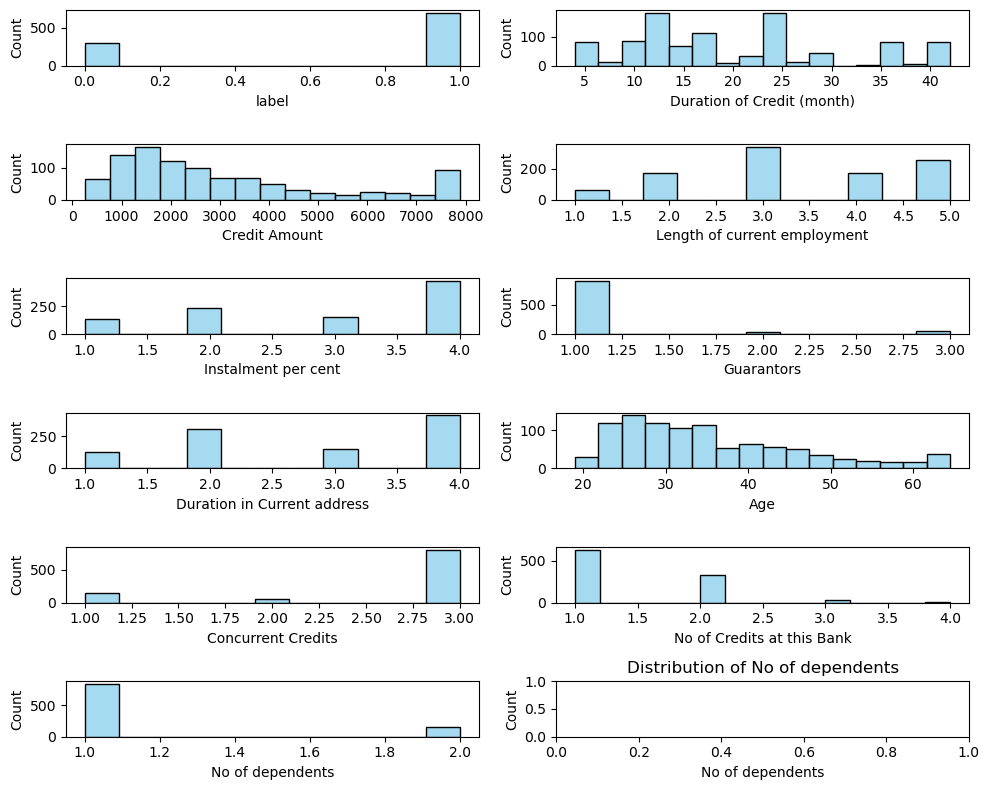

In [10]:
create_hist_plot(data_frame=numerical_df, feature_list=numerical_df.columns.to_list())

**OBSERVATIONS**
- Label: This histogram represents a binary outcome variable (e.g., default: 0 or 1). The distribution shows a majority of the data in the 0.0 class, suggesting most subjects in this dataset do not represent the bad case.

- Credit Amount: This shows the distribution of the amount of credit issued to subjects. It appears right-skewed, meaning most of the credits are of lower amounts.

- Installment per cent: The most common category is 4.0%, which suggests that a significant portion of borrowers are allocating 4% of their disposable income towards installment payments. Other categories have notably fewer counts.

- Guarantors: The vast majority have 1 guarantor and beyond are significantly lower and quite similar to each other. The absence of zero might suggest that at least one guarantor is required for credit/loan applications in this dataset, or that the data selection is focused on cases where guarantors are present.

- Age: The distribution is somewhat right-skewed, indicating fewer older individuals within the dataset.

- Number of Credits at this Bank: A vast majority have only one credit at this bank, which is heavily dominant over the other categories.

- Concurrent Credits: The largest number of individuals have 3.00 concurrent credits, suggesting that it's not uncommon for individuals in this dataset to have multiple concurrent credits.

- Number of Dependents: A large majority have 1.0 dependent, indicating that it's more common for individuals in this dataset to have only one dependent

**Categorical data**

In [11]:
categorical_df = data.select_dtypes(include = "object")

In [12]:
categorical_df.head(2)

,Account type,Payment Status of Previous Credit,Purpose,Savings type,Marital Status,Most valuable available asset,Type of apartment,Occupation,Foreign Worker
0,1,4,2,1,2,2,1,3,1
1,1,4,0,1,3,1,1,3,1


In [13]:
def create_bar_plot(data_frame, feature_list):
    num_features = len(feature_list)
    num_rows = (num_features + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(10,8))
    # flatten axes for iteration
    axes = axes.flatten()
    for index, feature in enumerate(feature_list):    
        values = data_frame[feature].value_counts()
        axes[index].bar(values.index, values )
        axes[index].set_title(f'Distribution of {feature}')
        # Hide any extra axes if the number of features is odd
    if num_features % 2 != 0:
        for i in range(num_features, len(axes)):
            fig.delaxes(axes[i])  # Remove empty subplots
    plt.tight_layout()

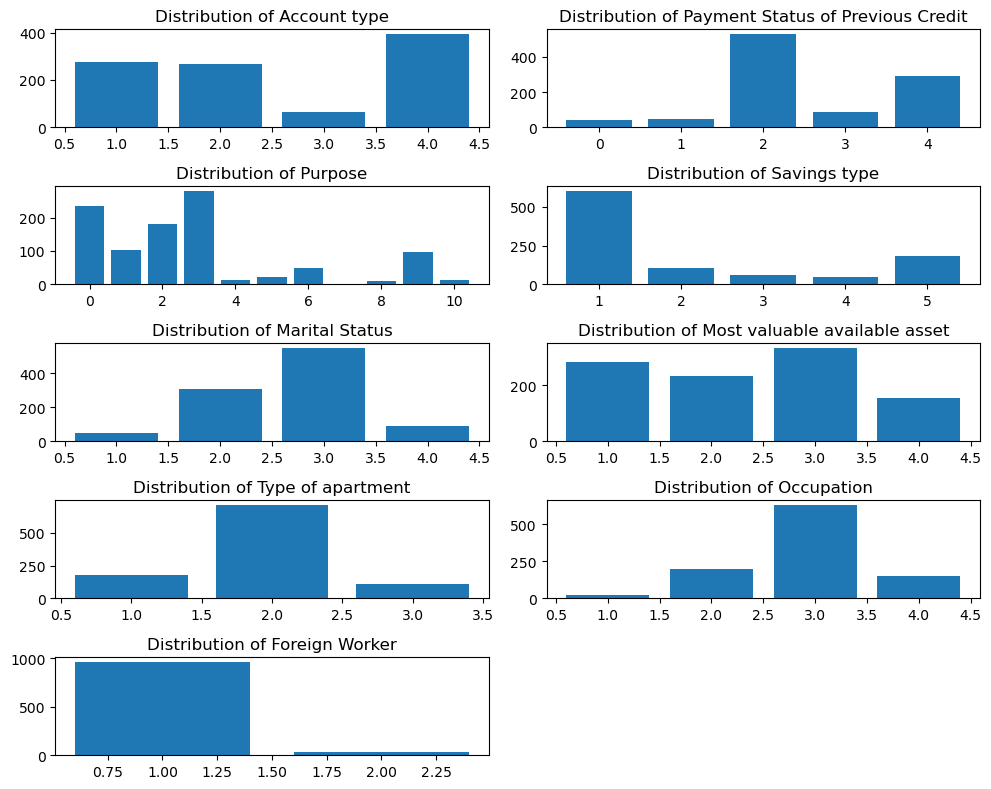

In [14]:
create_bar_plot(data_frame=categorical_df, feature_list=categorical_df.columns.to_list())

**Observation**
- Distribution of Account Type: The highest frequency is observed at the category labeled as 4.0, suggesting that this account type is the most prevalent among the dataset. Categories 1.0 and 2.0 show a moderate frequency, while category 3.0 is the least common.

- Distribution of Purpose: The purpose labeled as 2 has the highest frequency, indicating it is the most common reason associated with the dataset, whereas purpose labeled as 0 is the next most frequent. The other purposes (4, 6, 8, 10) are less common, with particularly low frequencies for purposes 6, 8, and 10.

- Payment Status of Previous Credit:The most common status is 2, suggesting it could represent a favorable condition like timely payments. Status 1 follows in frequency, with 0 and 4 being less common, and 3 being the rarest.

- Savings Type: The most common type is 1, which suggests it might be a standard or basic savings format. Types 2 and 5 also show significant representation, indicating moderate preference, while types 3 and 4 are least common, possibly representing more specialized or less popular savings products.

- Distribution of Marital Status: The most prevalent status is category 3.0, suggesting it could be a common marital condition such as married or single

- Distribution of Type of Apartment: Category 2.0 dominates, indicating it's the most common type of apartment within the dataset.

- Foreign workers: There is a significant skew in the data, with almost all instances falling under the category '1.00' and virtually none under '2.00'. This suggests that one category overwhelmingly dominates, which could indicate either a data collection bias or a real-world prevalence of one category over the other.

**Possible impact on model training**
- Issues of class imbalance might arise during model training, particularly for features like Foreign Workers. Techniques like resampling or class weighting to ensure the model is not biased toward the majority classes might be applied.

-  Due to skewness of some features consider normalizing or log-transforming these features to make the distributions more symmetrical. This can help the model better capture the relationships between these features and the target label.

- Categories with low frequencies might be hard for the model to learn from, as there is insufficient data for these categories to contribute meaningfully to the predictions. Techniques like feature engineering, where you group less frequent categories together, can improve model performance.

- The label distribution shows a dominance of class 0 (good). **The target class imbalance** can result in a model that predicts class 0 most of the time, leading to poor performance on class 1 predictions. Consider using class balancing techniques like oversampling class 1 or undersampling class 0, or using algorithms that handle imbalance **(e.g., XGBoost, balanced random forest)**. You can also monitor metrics like **precision, recall, and F1-score** rather than just **accuracy.**

- Since almost all individuals have 1 guarantor and 3 concurrent account, the model might not find these features very useful for distinguishing between the target classes. Consider dropping them or performing further feature engineering to derive more useful insights.

## Bivariate analysis

**Numerical features**

In [15]:
def corr_plot(data_frame):
    # get correlation of dataframe
    df_corr = data_frame.corr(method = "spearman")
    # draw heatmap of correlation
    plt.figure(figsize = (10,8))
    mask_1 = np.triu(np.ones_like(data_frame.corr(), dtype = bool))
    sns.heatmap(data=df_corr, cmap = "viridis", vmin = -1, vmax = 1, mask = mask_1, annot = True)
    plt.xticks(rotation = 70)
    plt.show()
    

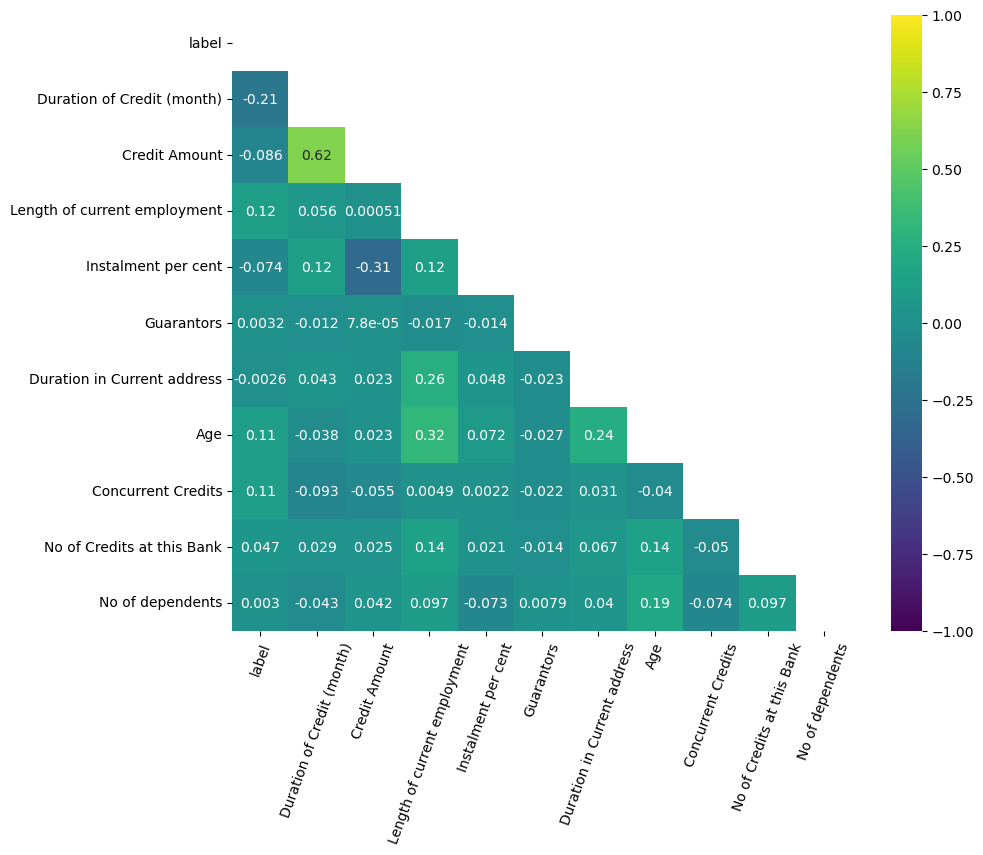

In [16]:
corr_plot(numerical_df)

**Observations**
- Duration of Credit (month) has the most significant negative correlation with the "label" at approximately -0.205. This suggests that as the duration of the credit increases, the likelihood of a positive outcome on the label decreases. This could imply that longer credit terms might be associated with increased risk or unfavorable outcomes.

- Age shows a modest positive correlation with the label, suggesting that older individuals may be slightly more likely to have positive credit outcomes, such as being more reliable in meeting their credit obligations

- Concurrent account variable also displays a modest positive correlation with label, indicating that having multiple concurrent credits might be associated with a positive credit behavior or higher creditworthiness.

- The strongest positive correlation is seen between the "Credit Amount" and "Duration of Credit (month)", with a coefficient of 0.62. This suggests that longer credit durations typically involve larger credit amounts.

-  The negative correlation of -0.31 between "Installment per cent" and "Credit Amount" means that when people borrow more money, the portion of their income that goes to the loan payment each month tends to be smaller.

- Variables like "Age" and "Duration in Current Address" have a correlation of 0.26, suggesting a moderate positive relationship, where older applicants tend to have lived longer at their current addresses

- The heatmap suggests that there are significant correlations involving "Age" with both "Length of current employment" and "Duration in Current Address". These correlations show that older people often have the same job and live in the same place for many years. As people get older, they tend to stick with what they know, whether it's their job or their home.

- The correlation between "Age" and "Concurrent Credits" is -0.27, indicating that younger individuals might have more concurrent credit lines.

**Categorical features**

In [17]:
def creat_grouped_bar_charts(data_frame, target):
    feature_list = data_frame.columns.to_list()

    num_cols = 2
    num_rows = (len(feature_list) + 1)//2

    fig, axes = plt.subplots(ncols= num_cols, nrows = num_rows, figsize = (10,8))
    axes = axes.flatten()

    for index, feature in enumerate(feature_list):
        sns.countplot(data = data_frame, x = feature, ax = axes[index], order = data[feature].value_counts().index, hue = target)

    plt.tight_layout()

    for ax in axes[7:]:
        fig.delaxes(ax)

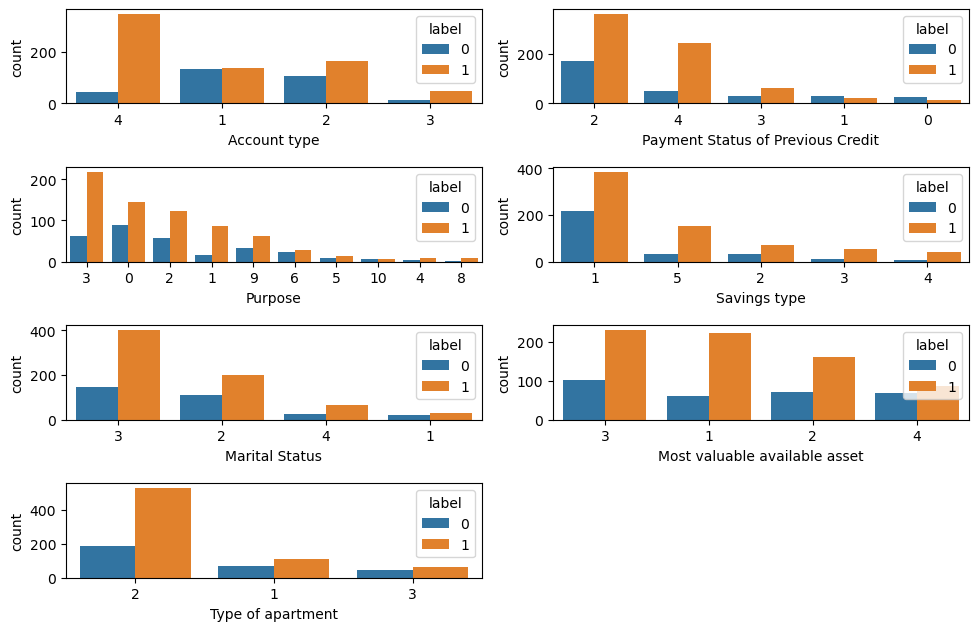

In [18]:
creat_grouped_bar_charts(categorical_df, data["label"])